# Name: `Jayveersinh Raj`
# Email: j.raj@innopolis.university
# Group: BS20-DataScience-01

# 1.1 Preprocessing
## Encoding categorical values

In [255]:
# Loading data from csv file
import pandas as pd
df = pd.read_csv("a1_dataset.csv")
df.head()

,target,var1,var2,var3,var4,var5,var6,var7
0,0,509.18,417.681,Micronesia,138.0,393.00,no,2019-07-20 13:21:37
1,0,446.06,666.182,Dominica,81.0,352.05,yes,2019-04-04 21:30:46
2,1,235.50,398.097,Isle of Man,90.0,339.00,no,2019-03-03 02:59:37
3,0,306.02,518.163,Turkmenistan,102.0,439.25,yes,2019-03-19 08:00:58
4,0,453.08,600.156,Cameroon,105.0,422.95,no,2019-03-18 13:22:35


### Getting some information on `var3` to decide which encoding might be better

In [256]:
df["var3"].value_counts()

Czech Republic           9
Greece                   8
Senegal                  8
Australia                8
South Africa             8
                        ..
Jordan                   1
Guadeloupe               1
Lesotho                  1
Bermuda                  1
Saint Kitts and Nevis    1
Name: var3, Length: 236, dtype: int64

#1. Ordinal Encoding
## var3 and var6 columns

## For var3

In [257]:
from sklearn.preprocessing import OrdinalEncoder

# Categorical encoding for var3
df['var3'] = OrdinalEncoder().fit_transform(df[['var3']])
print(f"Some of the encoded categorical values: {df['var3']}")
print(df.head())

Some of the encoded categorical values: 0      137.0
1       57.0
2      101.0
3      216.0
4       36.0
       ...  
920     19.0
921    105.0
922    179.0
923     41.0
924      1.0
Name: var3, Length: 925, dtype: float64
   target    var1     var2   var3   var4    var5 var6                 var7
0       0  509.18  417.681  137.0  138.0  393.00   no  2019-07-20 13:21:37
1       0  446.06  666.182   57.0   81.0  352.05  yes  2019-04-04 21:30:46
2       1  235.50  398.097  101.0   90.0  339.00   no  2019-03-03 02:59:37
3       0  306.02  518.163  216.0  102.0  439.25  yes  2019-03-19 08:00:58
4       0  453.08  600.156   36.0  105.0  422.95   no  2019-03-18 13:22:35


## For var6, Remember this are our target

In [258]:
from sklearn.preprocessing import OrdinalEncoder

# Categorical encoding for var3
df['var6']= OrdinalEncoder().fit_transform(df[['var6']])
print(f"Some of the encoded categorical values: {df['var6']}")
print(df.head())

Some of the encoded categorical values: 0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
920    1.0
921    0.0
922    1.0
923    1.0
924    1.0
Name: var6, Length: 925, dtype: float64
   target    var1     var2   var3   var4    var5  var6                 var7
0       0  509.18  417.681  137.0  138.0  393.00   0.0  2019-07-20 13:21:37
1       0  446.06  666.182   57.0   81.0  352.05   1.0  2019-04-04 21:30:46
2       1  235.50  398.097  101.0   90.0  339.00   0.0  2019-03-03 02:59:37
3       0  306.02  518.163  216.0  102.0  439.25   1.0  2019-03-19 08:00:58
4       0  453.08  600.156   36.0  105.0  422.95   0.0  2019-03-18 13:22:35


## Handling date time. (Extra task)

### Checking the dtype of `var7`

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  925 non-null    int64  
 1   var1    925 non-null    float64
 2   var2    925 non-null    float64
 3   var3    925 non-null    float64
 4   var4    325 non-null    float64
 5   var5    925 non-null    float64
 6   var6    925 non-null    float64
 7   var7    925 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 57.9+ KB


### Converting `var7` from `object` dtype to `string` dtype

In [260]:
# var7 is object, we convert it to string datatype
import pandas as pd
df['var7'] = df['var7'].astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  925 non-null    int64  
 1   var1    925 non-null    float64
 2   var2    925 non-null    float64
 3   var3    925 non-null    float64
 4   var4    325 non-null    float64
 5   var5    925 non-null    float64
 6   var6    925 non-null    float64
 7   var7    925 non-null    string 
dtypes: float64(6), int64(1), string(1)
memory usage: 57.9 KB


### Spliting on `whitespace` to separate `Date-Time`, then we convert the Date and Time to `datetime` dtype.

### Then we create 6 features from it, namely `year`, `month`, `day`, `hour`, `minute`, `seconds`

In [261]:
# Lets split date from time to encode them 
for i,j in df['var7'].items():
    date = j.split()

# Lets append the date, month and day to the data frame by splitting it
df['date'] = date[0]

# Convert it to date time
df['date'] = pd.to_datetime(df['date'])

# Split year , month , and date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Now lets remove the date series because we do not need it anymore
df = df.drop(['date'], axis = 1)


# Now lets extract information from time in the same way
df['time'] = date[1]

# Convert it to date time
df['time'] = pd.to_datetime(df['time'])

# Split hour , minutes , and seconds
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df['seconds'] = df['time'].dt.second

# Now lets remove the date series because we do not need it anymore
df = df.drop(['time'], axis = 1)

# Lets now also drop 'var7' it is unecessary now
df = df.drop(['var7'], axis = 1)
df.head()


,target,var1,var2,var3,var4,var5,var6,year,month,day,hour,minute,seconds
0,0,509.18,417.681,137.0,138.0,393.00,0.0,2019,6,18,17,23,26
1,0,446.06,666.182,57.0,81.0,352.05,1.0,2019,6,18,17,23,26
2,1,235.50,398.097,101.0,90.0,339.00,0.0,2019,6,18,17,23,26
3,0,306.02,518.163,216.0,102.0,439.25,1.0,2019,6,18,17,23,26
4,0,453.08,600.156,36.0,105.0,422.95,0.0,2019,6,18,17,23,26


#2. Data imputation

## Linear Regression
Target var4, 600 are empty, so let's make those 600 as prediction set, and use others to predict var4

In [262]:
# Lets first get the NULL valued data and store it in X_pred variable
import numpy as np
X_index = np.where(df['var4'].isna())[0] # Will return inedex of all the columns with Null values

# Now lets save them for Predictions
X_pred = df.iloc[X_index, :]


# Drop them from our DataFrame
df.drop(df[df.var4.isna()].index, inplace = True)

# Lets check the shapes to see if it works
df.shape, X_pred.shape

((325, 13), (600, 13))

### Splitting and preparing targets and predictors. 
### **Note:** `X_pred` is the set with `NaN values of var4`

In [263]:
# Now lets split the target from it
# Our target y
y = df.var4

# Our independent variables X
X = df.drop(['var4'], axis = 1)

# We only have 325 data left, so lets use 25 to evaluate/test, and rest 300 to train
X_train = X[:300][:]
X_test = X[300:][:]

y_train = y[:300]
y_test = y[300:]

# Our prediction data
X_pred = X_pred.drop(['var4'], axis = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_pred.shape

((300, 12), (25, 12), (300,), (25,), (600, 12))

## Linear Regression model

In [264]:
from sklearn.linear_model import LinearRegression
# function to perform linear regression
# Linear regression model
linear_model = LinearRegression()

# Fitting it to the traing set
linear_model.fit(X_train, y_train)

LinearRegression()

### Predictions on the above `Linear Regression model`

In [265]:
# Lets check the prediction
y_pred_linear = linear_model.predict(X_test)
y_pred_linear.shape

(25,)

### Function that give `MAE`, `MSE`, and `RMSE`, provided `y test` and `y predicted`

In [266]:
# Now lets create a function that can give us the MAE, MSE, and RMSE
from sklearn import metrics
def loss(y_test, y_pred):
  return metrics.mean_absolute_error(y_test, y_pred), \
         metrics.mean_squared_error(y_test, y_pred),  \
         np.sqrt(metrics.mean_squared_error(y_test, y_pred))


### A `DataFrame` that give `visualisation` of the `losses` on `Linear regression model`

In [267]:
# Lets check the loss now
mae, mse, rmse = loss(y_test, y_pred_linear)
loss_array = np.array([[mae, mse, rmse]])

loss_linear = pd.DataFrame(loss_array, columns = ["MAE", "MSE", "RMSE"])
loss_linear

,MAE,MSE,RMSE
0,12.612435,252.106115,15.87785


##Polynomial Regression
### This is for all the `degrees from 2 to 4`, and gives a `DataFrame visualisation of their losses`

In [268]:
# Lets try polynomial regression now
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
degree = []
mae_list = []
mse_list = []
rmse_list = []
# Lets try 3 of the polynomial degrees as in condition
for i in range(2, 5):
  poly = PolynomialFeatures(i)
  X_train_poly = poly.fit_transform(X_train)
 
  # function to perform linear regression
  # Linear regression model
  poly_model = LinearRegression()

  # Fitting it to the traing set
  poly_model.fit(X_train_poly, y_train)

  y_pred_poly = poly_model.predict(poly.fit_transform(X_test))

  # Lets check the loss now
  mae, mse, rmse = loss(y_test, y_pred_poly)

  # Store them in a list
  degree.append(i)
  mae_list.append(mae)
  mse_list.append(mse)
  rmse_list.append(rmse)

# Create a numpy array from it
degree = np.array(degree)
mae_list = np.array(mae_list)
mse_list = np.array(mse_list)
rmse_list = np.array(rmse_list)

# Create a dataframe to visualise
losses = np.array([degree, mae_list, mse_list, rmse_list]).T
loss_comp_poly = pd.DataFrame(losses, columns = ["Degree", "MAE", "MSE", "RMSE"])
loss_comp_poly

,Degree,MAE,MSE,RMSE
0,2.0,10.912970,194.959007,13.962772
1,3.0,8.550560,192.182485,13.862990
2,4.0,13.135752,401.399746,20.034963


## Finding optimal from these degrees

### Lowest `MAE` producing degree

In [269]:
print("Lowest MAE producing degree: \n")
lowest_mae = (loss_comp_poly.MAE.min())
loss_comp_poly[(loss_comp_poly.MAE == lowest_mae)]

Lowest MAE producing degree: 



,Degree,MAE,MSE,RMSE
1,3.0,8.55056,192.182485,13.86299


### Lowest `MSE` producing degree

In [270]:
print("Lowest MSE producing degree: \n")
lowest_mse = (loss_comp_poly.MSE.min())
loss_comp_poly[(loss_comp_poly.MSE == lowest_mse)]

Lowest MSE producing degree: 



,Degree,MAE,MSE,RMSE
1,3.0,8.55056,192.182485,13.86299


### Lowest `RMSE` producing degree

In [271]:
print("Lowest RMSE producing degree: \n")
lowest_rmse = (loss_comp_poly.RMSE.min())
loss_comp_poly[(loss_comp_poly.RMSE == lowest_rmse)]

Lowest RMSE producing degree: 



,Degree,MAE,MSE,RMSE
1,3.0,8.55056,192.182485,13.86299


### We can see that `degree 3` slightly is better for in all `MAE`, `MSE`, and `RMSE`


In [272]:
# Lets save the best loss and save it in this below DataFrame

#Lets drop the degree column and compare it with the linear loss DataFrrame that we had
loss_comp_poly = loss_comp_poly[(loss_comp_poly.Degree) == 3].drop('Degree', axis = 1)

# Dropping the index to make comparisons
loss_comp_poly = loss_comp_poly.reset_index(drop = True)

# Comparing best polynomial degree with linear
loss_comp_poly < loss_linear

,MAE,MSE,RMSE
0,True,True,True


## It can be seen that degree 3 polynomial is the best result yielding model in terms of loss, so lets choose it

In [273]:
# Polynomial regression with degree 3
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
 
# function to perform linear regression
# Linear regression model
poly_model = LinearRegression()# Fitting it to the traing set
poly_model.fit(X_train_poly, y_train)

LinearRegression()

## Finding the missing values using `Polynomial Regression with degree 3`

In [274]:
# Now lets predict our missing values
y_pred = poly_model.predict(poly.fit_transform(X_pred))


### Adding the `predicted values` with `Prediction set` of independant variables

In [275]:
# Adding the predicted var4 with X_pred
X_pred['var4'] = y_pred
X_pred.head()

,target,var1,var2,var3,var5,var6,year,month,day,hour,minute,seconds,var4
325,1,304.98,492.700,24.0,444.85,1.0,2019,6,18,17,23,26,346.089834
326,1,302.36,515.935,137.0,177.75,1.0,2019,6,18,17,23,26,118.735342
327,1,261.68,386.454,58.0,412.45,1.0,2019,6,18,17,23,26,193.964102
328,1,317.60,155.983,14.0,323.15,0.0,2019,6,18,17,23,26,98.651357
329,0,465.08,606.384,155.0,421.45,1.0,2019,6,18,17,23,26,115.415518


### `Rearranging` the `column names` so that we can `append` the `prediction set` with `original set` since by adding `y_pred` `var4` is added at the `end of the DataFrame`

In [276]:
# Lets rearrange the columns so that we could append it later to our original df
xlist = list(X_pred.columns)
xlist.insert(4, xlist[-1])
xlist.pop(-1)

# Checking the list of columns
xlist

['target',
 'var1',
 'var2',
 'var3',
 'var4',
 'var5',
 'var6',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'seconds']

### Checking `Rearranged` column, that is `ready` for `appending`. 
### **Note:** It is important that the column names are in same arrangement as the original, that's we could not leave `var4` at the `end`. Else, appending would be difficult

In [277]:
# Lets add our arranged rows to X_pred
X_pred = X_pred[xlist]
X_pred.head()

,target,var1,var2,var3,var4,var5,var6,year,month,day,hour,minute,seconds
325,1,304.98,492.700,24.0,346.089834,444.85,1.0,2019,6,18,17,23,26
326,1,302.36,515.935,137.0,118.735342,177.75,1.0,2019,6,18,17,23,26
327,1,261.68,386.454,58.0,193.964102,412.45,1.0,2019,6,18,17,23,26
328,1,317.60,155.983,14.0,98.651357,323.15,0.0,2019,6,18,17,23,26
329,0,465.08,606.384,155.0,115.415518,421.45,1.0,2019,6,18,17,23,26


### Appending the `Predicted set` with `Original set`

In [278]:
# Now we will append it to our original df, and check it's shape
df = df.append(X_pred)
df.shape

(925, 13)

### `Confirming` that there exists `No more NaN values`

In [279]:
# Lets check and see if null values are still there
df['var4'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
920    False
921    False
922    False
923    False
924    False
Name: var4, Length: 925, dtype: bool

##PCA 
###using the steps provided in the lecture slides

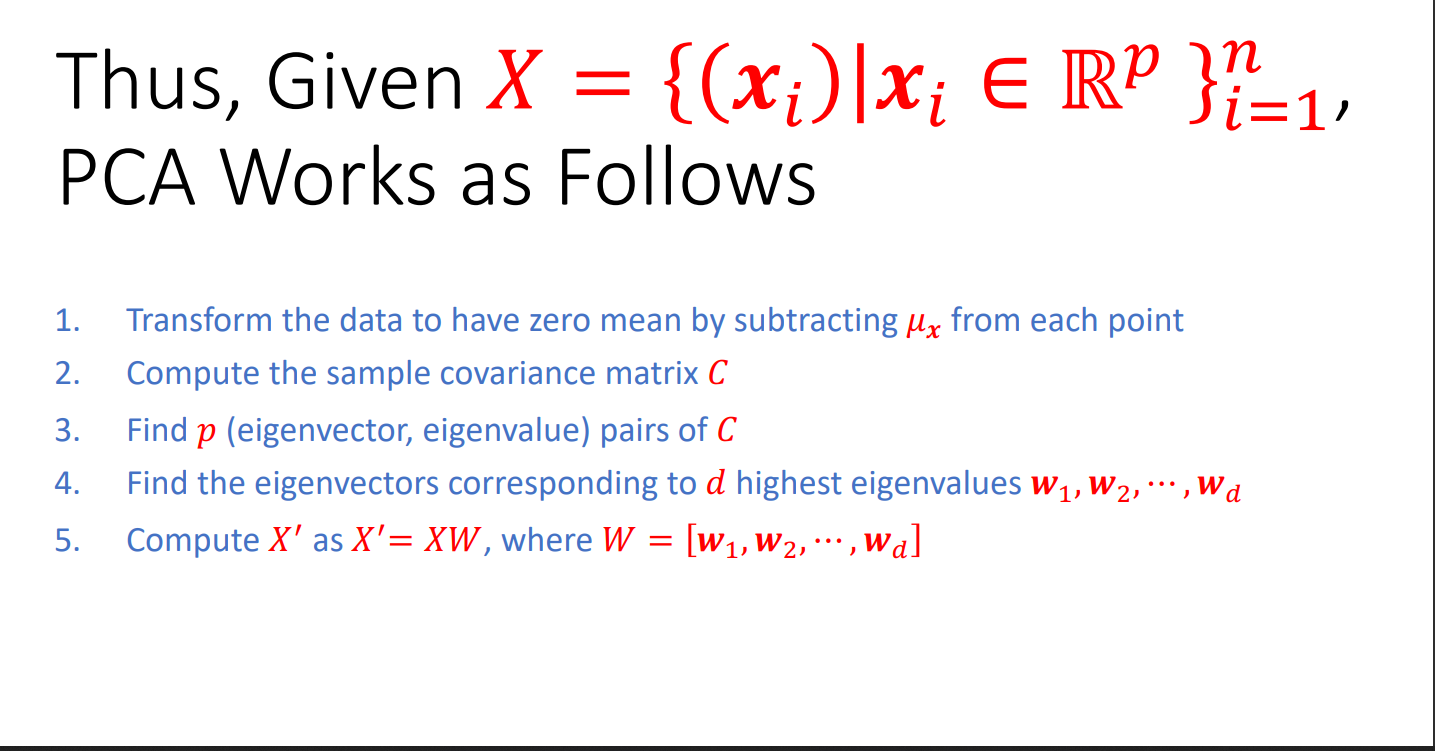

### There are `2 functions below`
### 1. `sort_desc_eigens (e_values, e_vectors, n_components):` A function that takes `eigen values`, `eigen vectors`, and `number of components` to satisfy `4th statement "Eigen vectors corresponding to d highest Eigen values"`

### 2. `PCA(X, n_components):` Accepts a `DataFrame` or `Array like`, and a number i.e. `Number of components` to which one wants to reduce. It is the complete `functional implementation`, and returns the reduced X, that is the reduced `DataFrame` or `Array like` that is being passed to it.

In [280]:
# Lets create a PCA function following the steps above
from numpy.linalg import eig as eig

def sort_desc_eigens(e_values, e_vectors, n_components):
  # Sorted indexes for eigen values
   indexes = np.argsort(e_values)[::-1]

  # Sorted eigen values
   e_values_sorted = e_values[indexes]

  # Sorted eigen vectors
   e_vectors_sorted = e_vectors[:,indexes]
  
  # Subset based on number of components
   e_vectors_sorted_subst = e_vectors_sorted[:,0:n_components]
  
 
   return e_values_sorted, e_vectors_sorted_subst


def pca(X, n_components):
  # 1. Transforming the data by subtracting the mean
  X_mean = X - np.mean(X, axis = 0)

  # 2. Calculating the covariance matrix
  covariance = np.cov(X.T) # False is positional to show that columns are our features

  # 3. Eigen values and eigen vectors 
  e_values , e_vectors = eig(covariance)


  # 4. Sorting corresponding descending eigen values and vectors
  e_values_sorted , e_vectors_sorted_subst = sort_desc_eigens(e_values, 
                                                              e_vectors,
                                                              n_components)
  
  # 5. Reduced (New X) according to the forumla
  X_reduced = np.dot(e_vectors_sorted_subst.transpose() , X_mean.transpose() ).transpose()

  return X_reduced


### `Spliting` the `target` variable from the `DataFrame` to prepare it for `PCA`

In [281]:
# Lets save the target variable seprately
target = df['target']
df = df.drop(['target'], axis = 1)
df.head()

,var1,var2,var3,var4,var5,var6,year,month,day,hour,minute,seconds
0,509.18,417.681,137.0,138.0,393.00,0.0,2019,6,18,17,23,26
1,446.06,666.182,57.0,81.0,352.05,1.0,2019,6,18,17,23,26
2,235.50,398.097,101.0,90.0,339.00,0.0,2019,6,18,17,23,26
3,306.02,518.163,216.0,102.0,439.25,1.0,2019,6,18,17,23,26
4,453.08,600.156,36.0,105.0,422.95,0.0,2019,6,18,17,23,26


## Plotting using PCA

### A function to `call PCA` and return a `DataFrame` to be visualised in `Tabular DataFrame of Pandas`.
### **For 2 or 3 reduced dimensions, as more than that are hard to visualise as plots**

In [282]:
# A function that applies PCA and returns a reduced dataframe to be plot directly
def reduced_df(df, n_components):
   X_reduced = pca(df, n_components)
   
   # Create DataFrame with reduced values, with 3 components
   if(n_components == 3):
      X_reduced_df = pd.DataFrame(X_reduced , columns = ['PC1','PC2', 'PC3'])

   if(n_components == 2):
     X_reduced_df = pd.DataFrame(X_reduced , columns = ['PC1','PC2'])

   # Lets concatenate it with target to complete the dataset
   p_df = pd.concat([X_reduced_df , pd.DataFrame(target)] , axis = 1)

   return p_df

## 3D plot with 3 components for PCA

### The above function `reduced_df` is called to call `PCA` and `reduce it to 3 dimensions` and return a DataFrame for `3D scatter plot`

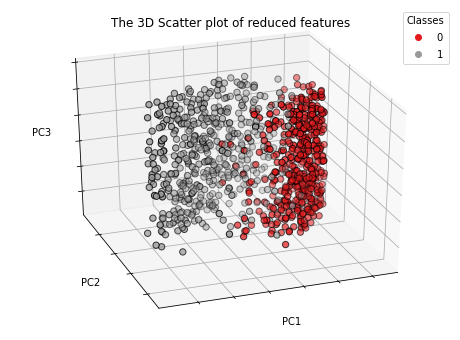

In [283]:
# A call to get a dataframe after PCA reduced
p_reduced_3d = reduced_df(df, 3)
y = p_reduced_3d.target

# Imports to plot
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# Plotting the three features and their classification

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

scatter = ax.scatter(
    p_reduced_3d.PC1,
    p_reduced_3d.PC2,
    p_reduced_3d.PC3,
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)


# produce a legend of classes with the unique colors from the scatter plot
legend1 = ax.legend(*scatter.legend_elements(),
                    title="Classes")

ax.set_title("The 3D Scatter plot of reduced features")
ax.set_xlabel("PC1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("PC2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("PC3")
ax.w_zaxis.set_ticklabels([])

plt.show()

## 2D scatter plot with 2 components

### The function `reduced_df` is called to call `PCA` and `reduce it to 2 dimensions` and return a DataFrame for `2D scatter plot`

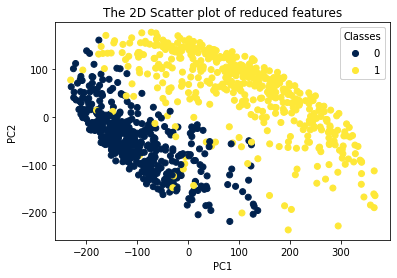

In [284]:
p_df = reduced_df(df, 2)

fig, ax = plt.subplots()
scatter = ax.scatter(p_df.PC1, p_df.PC2,
            c=p_df['target'], cmap = 'cividis')

# Create a legend of classes with the unique colors from the scatter plot
legend1 = ax.legend(*scatter.legend_elements(),
                    title="Classes")
ax.set_title("The 2D Scatter plot of reduced features")
ax.add_artist(legend1)

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

#1.2 Training
### All of the classifier are designed in a `robust` way with `KFold = 3`, to make code easy to `reuse`

## 1. Logistic Regression with KFolds Cross Validation with `k = 3`

### Below is `logistic_regression(X, y)` 
### function that is a `robust` implementation with `KFold k = 3` so that one can call if for `either reduced` or `non reduced` dimensions. Taking the `Independant variables X` and the `Target variable y`. And returns the `average score (accuracy) in this case` and `standard deviation between them`.

In [285]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

def logsitic_regression(X, y):
   
   # k = 3 i.e. n_splits = 3
   kf = KFold(n_splits = 3)
   
   # Create the logistic regression model
   model = LogisticRegression()
   
   # Evaluation of the model
   scores = cross_val_score(model, X, y, scoring='accuracy', cv = kf, n_jobs=-1)

   mean_score = np.mean(scores)
   
   # The performance i.e. Mean Classification acccuracy
   print(f"Mean Accuracy: {mean_score:.3f}%")
   print(f"\nStd. Deviation of Scores : {np.std(scores):.3f}")

   return mean_score

##2.  KNN (try the n neighbors hyperparameters between [1, 10] range)
## KFold Cross Validation with `k = 3`

## NOTE: Without scaling, all the nearest neighbors are aligned in the direction of the axis with the smaller range, i.e. x1 leading to incorrect classification.

In [286]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator

def knn_classifier(X, y):

   # Scaling to get all the data in same range
   scaler = StandardScaler()
   x_train = scaler.fit_transform(X)
   
   # k = 3 i.e. n_splits = 3
   kf = KFold(n_splits = 3)
   
   # List of the k that we will try
   Ks = list(range(1, 10))
   
   # Empty list to store the scores of individual Ks
   k_scores = []
   
   for K in Ks:
       
       # Choosing the Knn model
       knn = KNeighborsClassifier(n_neighbors = K)
   
       # Evaluation of the model
       scores = cross_val_score(knn, X, y, scoring='accuracy', 
                                cv = kf, n_jobs=-1)
   
       
       avg_score = np.mean(scores)
       k_scores.append(avg_score)
   
   plt.title('Varying accuracy on different K values')
   plt.plot(Ks, k_scores)
   plt.xlabel('K')
   plt.xticks(Ks)
   plt.ylabel('KFold CV Average accuracy')
   plt.show()
   
   mean_score = np.mean(k_scores)

   print()
   print('Best K:', Ks[np.argmax(k_scores)])
   # The performance i.e. Mean Classification acccuracy
   print(f"\nMean Accuracy: {mean_score:.3f}%")
   print(f"\nStd. Deviation of Scores : {np.std(k_scores):.3f}")

  

   return mean_score

## Naive Bayes classifier 
## KFold Cross Validation with `k = 3`


In [287]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

def naive_bayes_classifier(X, y):
  
   # k = 3, i.e. n_splits = 3
   kf = KFold(n_splits = 3)
   
   # Create the logistic regression model
   model = GaussianNB()
   
   # Evaluation of the model
   scores = cross_val_score(model, X, y, scoring='accuracy', cv = kf, n_jobs=-1)
   
   # Mean Score
   mean_score = np.mean(scores)
   
   # The performance i.e. Mean Classification acccuracy
   print(f"Mean Accuracy: {mean_score:.3f}%")
   print(f"\nStd. Deviation of Scores : {np.std(scores):.3f}")

  
   return mean_score

## 1. Using Preprocessed data

In [288]:
# Lets check our data first
df.head()

,var1,var2,var3,var4,var5,var6,year,month,day,hour,minute,seconds
0,509.18,417.681,137.0,138.0,393.00,0.0,2019,6,18,17,23,26
1,446.06,666.182,57.0,81.0,352.05,1.0,2019,6,18,17,23,26
2,235.50,398.097,101.0,90.0,339.00,0.0,2019,6,18,17,23,26
3,306.02,518.163,216.0,102.0,439.25,1.0,2019,6,18,17,23,26
4,453.08,600.156,36.0,105.0,422.95,0.0,2019,6,18,17,23,26


In [289]:
# Lets check the target
target.shape

(925,)

###1. Logistic Regression

In [290]:
log_result = logsitic_regression(df, target)

Mean Accuracy: 0.974%

Std. Deviation of Scores : 0.010


### 2. KNN

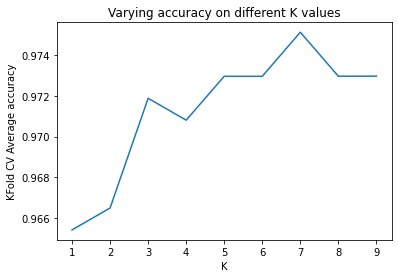


Best K: 7

Mean Accuracy: 0.971%

Std. Deviation of Scores : 0.003


In [291]:
knn_result = knn_classifier(df, target)

### 3. Naive Bayes

In [292]:
nb_result = naive_bayes_classifier(df, target)

Mean Accuracy: 0.973%

Std. Deviation of Scores : 0.002


### Their comparisons

In [293]:
# Lets save them in an array
scores_classifiers = np.array([[log_result, knn_result, nb_result]])

In [294]:
# Lets compare them making a DataFrame
mean_scores_classifiers = pd.DataFrame(scores_classifiers, 
                                       columns = ["Logistic Regression (%)", 
                                                  "KNN (%)", 
                                                  "Naive Bayes (%)"])
mean_scores_classifiers

,Logistic Regression (%),KNN (%),Naive Bayes (%)
0,0.974043,0.971287,0.972972


In [295]:
# Lets get the best of them
max_value = mean_scores_classifiers.max(axis = 1)
for col in mean_scores_classifiers:
        if (mean_scores_classifiers[col] == max_value).any():
             print(f"The maximum accuracy : {max_value.iloc[0]:.3f}%")
             print(f"Give by : {col.split('(')[0]}")

The maximum accuracy : 0.974%
Give by : Logistic Regression 


### `Logistic Regression` gives the best performance on `Non reduced dataset`

## 2. With PCA

### 1. Lets try from 1 to 11 components i.e. from 1 to column - 1 dimensional reductions

Mean Accuracy: 0.832%

Std. Deviation of Scores : 0.023


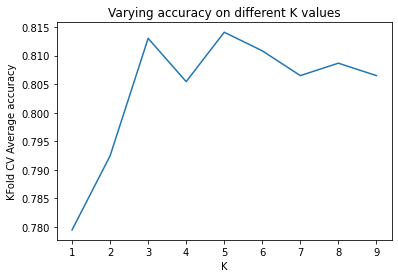


Best K: 5

Mean Accuracy: 0.804%

Std. Deviation of Scores : 0.011
Mean Accuracy: 0.826%

Std. Deviation of Scores : 0.024
Mean Accuracy: 0.959%

Std. Deviation of Scores : 0.019


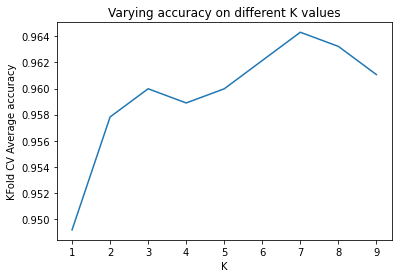


Best K: 7

Mean Accuracy: 0.960%

Std. Deviation of Scores : 0.004
Mean Accuracy: 0.949%

Std. Deviation of Scores : 0.007
Mean Accuracy: 0.956%

Std. Deviation of Scores : 0.018


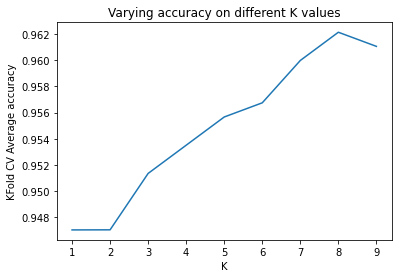


Best K: 8

Mean Accuracy: 0.955%

Std. Deviation of Scores : 0.005
Mean Accuracy: 0.948%

Std. Deviation of Scores : 0.010
Mean Accuracy: 0.955%

Std. Deviation of Scores : 0.021


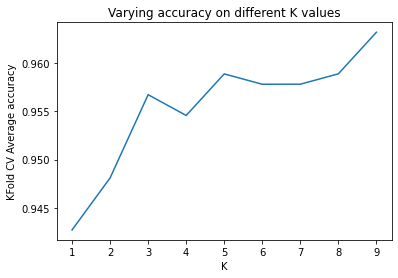


Best K: 9

Mean Accuracy: 0.955%

Std. Deviation of Scores : 0.006
Mean Accuracy: 0.947%

Std. Deviation of Scores : 0.006
Mean Accuracy: 0.974%

Std. Deviation of Scores : 0.007


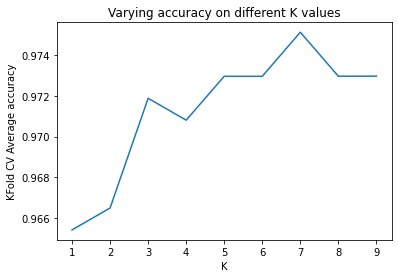


Best K: 7

Mean Accuracy: 0.971%

Std. Deviation of Scores : 0.003
Mean Accuracy: 0.956%

Std. Deviation of Scores : 0.004
Mean Accuracy: 0.974%

Std. Deviation of Scores : 0.010


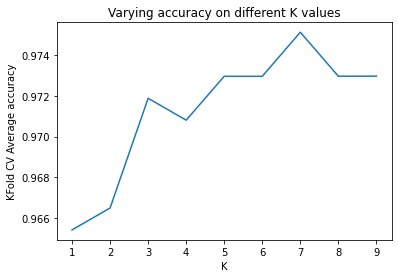


Best K: 7

Mean Accuracy: 0.971%

Std. Deviation of Scores : 0.003
Mean Accuracy: 0.955%

Std. Deviation of Scores : 0.003
Mean Accuracy: 0.974%

Std. Deviation of Scores : 0.010


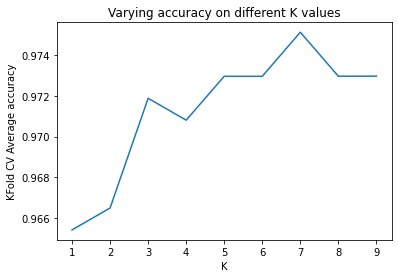


Best K: 7

Mean Accuracy: 0.971%

Std. Deviation of Scores : 0.003
Mean Accuracy: 0.955%

Std. Deviation of Scores : 0.003
Mean Accuracy: 0.974%

Std. Deviation of Scores : 0.010


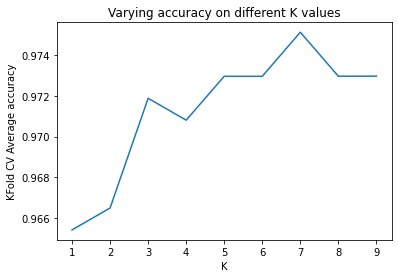


Best K: 7

Mean Accuracy: 0.971%

Std. Deviation of Scores : 0.003
Mean Accuracy: 0.955%

Std. Deviation of Scores : 0.003
Mean Accuracy: 0.974%

Std. Deviation of Scores : 0.010


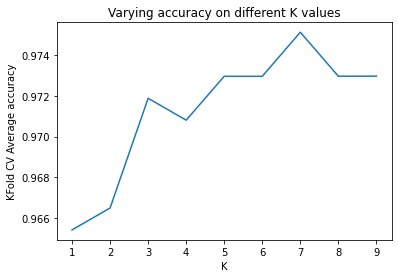


Best K: 7

Mean Accuracy: 0.971%

Std. Deviation of Scores : 0.003
Mean Accuracy: 0.955%

Std. Deviation of Scores : 0.003
Mean Accuracy: 0.974%

Std. Deviation of Scores : 0.010


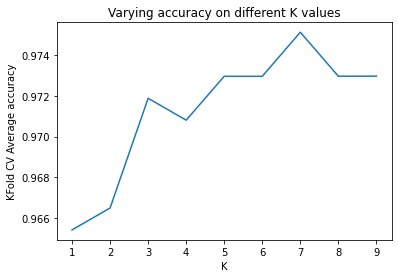


Best K: 7

Mean Accuracy: 0.971%

Std. Deviation of Scores : 0.003
Mean Accuracy: 0.955%

Std. Deviation of Scores : 0.003
Mean Accuracy: 0.974%

Std. Deviation of Scores : 0.010


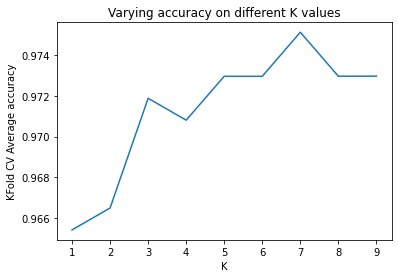


Best K: 7

Mean Accuracy: 0.971%

Std. Deviation of Scores : 0.003
Mean Accuracy: 0.955%

Std. Deviation of Scores : 0.003


In [296]:
# An empty DataFrame with the intention to be appended with score of each reduction
pca_df = pd.DataFrame()

# To try from 1 to 11 reduced dimensions
for i in range(1, len(df.columns)):
   X_reduced = pca(df, i)

   scores_classifiers_pca = np.array([[i, 
                                       logsitic_regression(X_reduced, target),
                                       knn_classifier(X_reduced, target), 
                                       naive_bayes_classifier(X_reduced, target)]])
   
   scores_classifiers_df = pd.DataFrame(scores_classifiers_pca, 
                                       columns = ["n_comp PCA",
                                                  "Logistic Regression (%)", 
                                                  "KNN (%)", 
                                                  "Naive Bayes (%)"])
   pca_df = pca_df.append(scores_classifiers_df)

### Lets see the dataframe collection of those PCA and their results that we get from classifiers

In [297]:
pca_df

,n_comp PCA,Logistic Regression (%),KNN (%),Naive Bayes (%)
0,1.0,0.832433,0.804100,0.825950
0,2.0,0.958895,0.959622,0.949180
0,3.0,0.955656,0.954942,0.948097
0,4.0,0.954563,0.955423,0.947019
0,5.0,0.974047,0.971287,0.955677
0,6.0,0.974043,0.971287,0.954594
0,7.0,0.974043,0.971287,0.954594
0,8.0,0.974043,0.971287,0.954594
0,9.0,0.974043,0.971287,0.954594
0,10.0,0.974043,0.971287,0.954594


In [298]:
# Lets get the best of them
pca_df['Logistic Regression (%)'].max(), pca_df['KNN (%)'].max(), pca_df['Naive Bayes (%)'].max()

(0.9740469886100955, 0.9712870732288208, 0.9556767396573221)

## Logistic Regression gives the Max of them all, as it can be seen easily. Lets find out for `what number of component`

In [299]:
max_value_pca = pca_df['Logistic Regression (%)'].max()

# Lets get the best of them
pca_df[(pca_df['Logistic Regression (%)'] == max_value_pca)]

,n_comp PCA,Logistic Regression (%),KNN (%),Naive Bayes (%)
0,5.0,0.974047,0.971287,0.955677


## Lets compare and see if PCA improved the performance

In [300]:
pca_df[(pca_df['Logistic Regression (%)'] == max_value_pca)] > mean_scores_classifiers['Logistic Regression (%)'].iloc[0]

,n_comp PCA,Logistic Regression (%),KNN (%),Naive Bayes (%)
0,True,True,False,False


## `Conclusion`:  For `PCA` with `5 components` we get the max value of using `Logistic Regression`

# Lasso Regression : To find useful and redundant features

In [301]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

# Train test split
X_train, X_test, y_train, y_test = train_test_split(df, target,
                                                    test_size=0.33, 
                                                    random_state=42)

# Pipeline
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])


# Grid search
search_cv = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, 
                      scoring="neg_mean_squared_error",
                      verbose=3
                      )

# Fitting on it
search_cv.fit(X_train,y_train)

# Searching th best
search_cv.best_params_

# Seacthing best estimators
coefficients = search_cv.best_estimator_.named_steps['model'].coef_

# Storing their importance by coefficent values
importance = np.abs(coefficients)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.063 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.056 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-0.043 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.081 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-0.054 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.114 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-0.107 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.097 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-0.125 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.105 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.178 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

### Useful features

In [302]:
features = df.columns
np.array(features)[importance > 0]

array(['var1', 'var2', 'var4', 'var5'], dtype=object)

### `var1`, `var2`, `var4`, `var5` are the `important features`

### Redundant features

In [303]:
np.array(features)[importance == 0]

array(['var3', 'var6', 'year', 'month', 'day', 'hour', 'minute',
       'seconds'], dtype=object)

###`var3`, `var6`, `year`, `month`, `day`, `hour`, `minute`, `seconds` are the redundant or useless features